In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [21]:
tf.set_random_seed(1)
np.random.seed(1)

# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise  



In [22]:
print(x)
print()

[[-1.        ]
 [-0.97979798]
 [-0.95959596]
 [-0.93939394]
 [-0.91919192]
 [-0.8989899 ]
 [-0.87878788]
 [-0.85858586]
 [-0.83838384]
 [-0.81818182]
 [-0.7979798 ]
 [-0.77777778]
 [-0.75757576]
 [-0.73737374]
 [-0.71717172]
 [-0.6969697 ]
 [-0.67676768]
 [-0.65656566]
 [-0.63636364]
 [-0.61616162]
 [-0.5959596 ]
 [-0.57575758]
 [-0.55555556]
 [-0.53535354]
 [-0.51515152]
 [-0.49494949]
 [-0.47474747]
 [-0.45454545]
 [-0.43434343]
 [-0.41414141]
 [-0.39393939]
 [-0.37373737]
 [-0.35353535]
 [-0.33333333]
 [-0.31313131]
 [-0.29292929]
 [-0.27272727]
 [-0.25252525]
 [-0.23232323]
 [-0.21212121]
 [-0.19191919]
 [-0.17171717]
 [-0.15151515]
 [-0.13131313]
 [-0.11111111]
 [-0.09090909]
 [-0.07070707]
 [-0.05050505]
 [-0.03030303]
 [-0.01010101]
 [ 0.01010101]
 [ 0.03030303]
 [ 0.05050505]
 [ 0.07070707]
 [ 0.09090909]
 [ 0.11111111]
 [ 0.13131313]
 [ 0.15151515]
 [ 0.17171717]
 [ 0.19191919]
 [ 0.21212121]
 [ 0.23232323]
 [ 0.25252525]
 [ 0.27272727]
 [ 0.29292929]
 [ 0.31313131]
 [ 0.33333

In [14]:
save_model_path = './mysave'

In [18]:
def save():
    print('This is save')
    # build neural network
    tf_x = tf.placeholder(tf.float32, x.shape)  # input x
    tf_y = tf.placeholder(tf.float32, y.shape)  # input y
    l = tf.layers.dense(tf_x, 10, tf.nn.relu)          # hidden layer
    o = tf.layers.dense(l, 1)                     # output layer
    loss = tf.losses.mean_squared_error(tf_y, o)   # compute cost
    train_op = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(loss)

    sess = tf.Session()
    sess.run(tf.global_variables_initializer())  # initialize var in graph

    saver = tf.train.Saver()  # define a saver for saving and restoring

    for step in range(100):                             # train
        sess.run(train_op, {tf_x: x, tf_y: y})
        
    saver.save(sess,save_model_path)
    # plotting
    pred, l = sess.run([o, loss], {tf_x: x, tf_y: y})
    plt.figure(1, figsize=(10, 5))
    plt.subplot(121)
    plt.scatter(x, y)
    plt.plot(x, pred, 'r-', lw=5)
    plt.text(-1, 1.2, 'Save Loss=%.4f' % l, fontdict={'size': 15, 'color': 'red'})
    
    
    
    

    

In [23]:
def reload():
    print('This is reload')
    # build entire net again and restore
    tf_xx = tf.placeholder(tf.float32, x.shape)  # input x
    tf_y = tf.placeholder(tf.float32, y.shape)  # input y
    l_ = tf.layers.dense(tf_xx, 10, tf.nn.relu)          # hidden layer
    o_ = tf.layers.dense(l_, 1)                     # output layer
    loss_ = tf.losses.mean_squared_error(tf_y, o_)   # compute cost

    sess = tf.Session()
    # don't need to initialize variables, just restoring trained variables
    saver = tf.train.Saver()  # define a saver for saving and restoring
    saver.restore(sess, save_model_path)

    # plotting
    pred, l = sess.run([o_, loss_], {tf_xx: x, tf_y: y})
    plt.subplot(122)
    plt.scatter(x, y)
    plt.plot(x, pred, 'r-', lw=5)
    plt.text(-1, 1.2, 'Reload Loss=%.4f' % l, fontdict={'size': 15, 'color': 'red'})
    plt.show()

This is save
This is reload


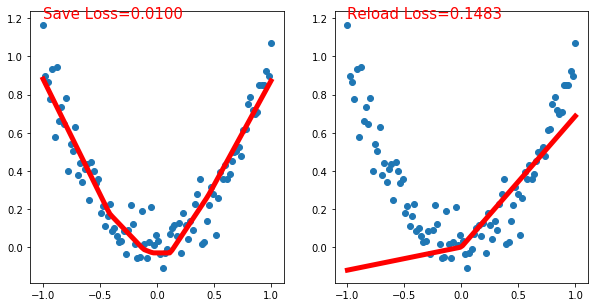

In [24]:
save()

# destroy previous net
tf.reset_default_graph()

reload()